In [1]:
import numpy as np

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
boston = pd.read_csv('HousingData.csv')

In [6]:
y = boston ['MEDV']

In [13]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


In [20]:

X = boston

In [21]:
decisiontree = DecisionTreeRegressor()

In [22]:
decisiontree.fit(X, y)

DecisionTreeRegressor()

In [23]:
importance = decisiontree.feature_importances_

In [24]:
importance

array([6.10686364e-02, 2.56479362e-03, 5.71093791e-03, 4.46369773e-04,
       4.93095147e-02, 5.82381681e-01, 2.60223208e-02, 6.17148618e-02,
       6.90926801e-04, 7.47585052e-03, 8.36133257e-03, 6.84484313e-03,
       1.87407931e-01])

In [28]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [30]:
importance = pd.Series( importance, index = X.columns)

In [41]:
importance =pd.DataFrame(importance.sort_values( ascending = False), X.columns)

In [43]:
importance.columns= ['features']

In [46]:
importance = importance.sort_values(by = 'features', ascending = False)

<Axes: >

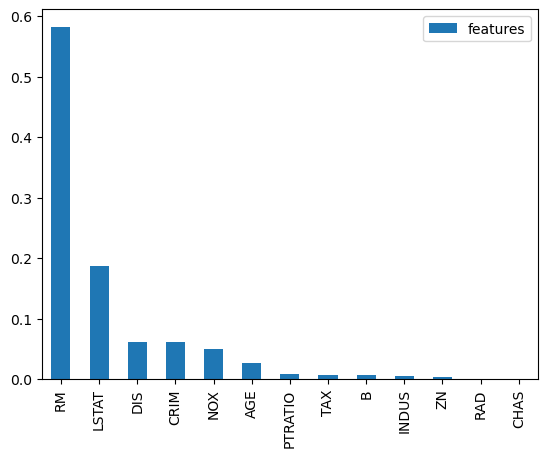

In [49]:
importance.plot( kind = 'bar')

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
random_forest = RandomForestRegressor()

In [74]:
X_train, X_test, y_train, y_test = train_test_split( X, y)

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
importance = pd.DataFrame(random_forest.feature_importances_ , X.columns)
importance.columns = ['features']

<Axes: >

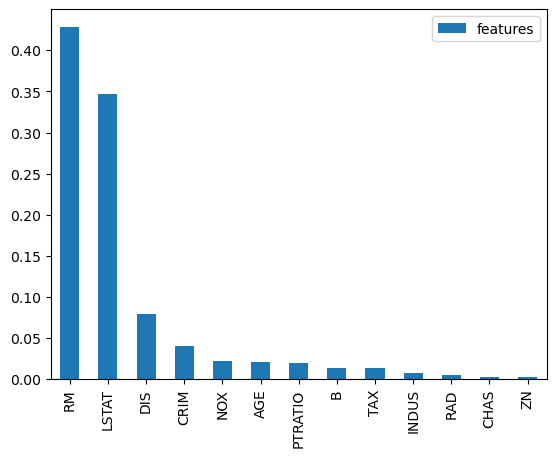

In [77]:
importance = importance.sort_values(by='features', ascending = False)
importance.plot(kind ='bar')

In [78]:
importance

,features
RM,0.428387
LSTAT,0.347368
DIS,0.079456
CRIM,0.040512
NOX,0.022148
AGE,0.020171
PTRATIO,0.019498
B,0.013845
TAX,0.012921
INDUS,0.007020


In [79]:
from sklearn.metrics import r2_score

In [80]:
score = r2_score( y_test, random_forest.predict(X_test))

In [81]:
score

0.9149008271675234

In [82]:
from sklearn.metrics import mean_squared_error

In [83]:
erro = mean_squared_error( y_test, random_forest.predict(X_test))

In [84]:
erro

7.558535228346467

In [86]:
from sklearn import preprocessing

In [88]:
scaler = preprocessing.StandardScaler().fit( X)

In [95]:
X_scaled = scaler.transform(X_train)

In [90]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
37,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5,279,19.2,396.90,8.77
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53
469,13.07510,0.0,18.10,0.0,0.580,5.713,56.7,2.8237,24,666,20.2,396.90,14.76
340,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29
111,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16
